In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')

import matplotlib.pyplot as plt
import json
from datetime import datetime

In [13]:
df = pd.read_csv("../data/hr_neighbors.csv")
print df.size

df["PDR"] = (df.numTxPackets - df.numTxFailures)/df.numTxPackets
df_clean = df[(df.numRxPackets >= 0) & (df.numTxPackets >= 0) & (df.numTxFailures >= 0) & (df.rssi<0)  & (df.PDR)]
print df.size - df_clean.size
#df_reduced = df_clean[df.time < 146176552]

df_clean
#df_reduced

1801456
1003203


time                      mac              neighborMac  \
0       1461283420  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-b0-00-87   
4       1461284320  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-b0-00-87   
5       1461284320  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-3f-f8-20   
9       1461285220  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-b0-00-87   
10      1461285220  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-3f-f8-20   
14      1461286120  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-b0-00-87   
15      1461286120  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-3f-f8-20   
19      1461287020  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-b0-00-87   
20      1461287020  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-3f-f8-20   
24      1461287920  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-60-03-82   
25      1461287920  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-b0-00-87   
26      1461287920  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-3f-f8-20   
30      1461288820  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-60-03-82   
31      1461288820  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-b0-00-87   
32      1461288820  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-3f-f8-20   
36      1461289720  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-60-03-82   
37      1461289720  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-b0-00-87   
38      1461289720  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-3f-f8-20   
42      1461290620  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-60-03-82   
43      1461290620  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-b0-00-87   
44      1461290620  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-3f-f8-20   
48      1461291520  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-60-03-82   
49      1461291520  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-b0-00-87   
53      1461292420  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-60-03-82   
54      1461292420  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-b0-00-87   
58      1461293321  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-60-03-82   
59      1461293321  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-b0-00-87   
63      1461294221  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-60-03-82   
64      1461294221  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-b0-00-87   
68      1461295120  00-17-0d-00-00-30-60-ef  00-17-0d-00-00-60-03-82   
...            ...                      ...                      ...   
224935  1466344032  00-17-0d-00-00-b0-00-cc  00-17-0d-00-00-b0-00-aa   
224943  1466345351  00-17-0d-00-00-b0-00-cc  00-17-0d-00-00-b0-00-aa   
224951  1466346551  00-17-0d-00-00-b0-00-cc  00-17-0d-00-00-b0-00-aa   
224959  1466347751  00-17-0d-00-00-b0-00-cc  00-17-0d-00-00-b0-00-aa   
224967  1466348951  00-17-0d-00-00-b0-00-cc  00-17-0d-00-00-b0-00-aa   
224975  1466349900  00-17-0d-00-00-b0-00-cc  00-17-0d-00-00-b0-00-aa   
224983  1466351351  00-17-0d-00-00-b0-00-cc  00-17-0d-00-00-b0-00-aa   
224991  1466352552  00-17-0d-00-00-b0-00-cc  00-17-0d-00-00-b0-00-aa   
224999  1466353751  00-17-0d-00-00-b0-00-cc  00-17-0d-00-00-b0-00-aa   
225007  1466354952  00-17-0d-00-00-b0-00-cc  00-17-0d-00-00-b0-00-aa   
225015  1466356151  00-17-0d-00-00-b0-00-cc  00-17-0d-00-00-b0-00-aa   
225023  1466357351  00-17-0d-00-00-b0-00-cc  00-17-0d-00-00-b0-00-aa   
225031  1466358552  00-17-0d-00-00-b0-00-cc  00-17-0d-00-00-b0-00-aa   
225039  1466359684  00-17-0d-00-00-b0-00-cc  00-17-0d-00-00-b0-00-aa   
225047  1466360953  00-17-0d-00-00-b0-00-cc  00-17-0d-00-00-b0-00-aa   
225055  1466362089  00-17-0d-00-00-b0-00-cc  00-17-0d-00-00-b0-00-aa   
225063  1466363351  00-17-0d-00-00-b0-00-cc  00-17-0d-00-00-b0-00-aa   
225071  1466364552  00-17-0d-00-00-b0-00-cc  00-17-0d-00-00-b0-00-aa   
225079  1466365752  00-17-0d-00-00-b0-00-cc  00-17-0d-00-00-b0-00-aa   
225087  1466366952  00-17-0d-00-00-b0-00-cc  00-17-0d-00-00-b0-00-aa   
225095  1466368082  00-17-0d-00-00-b0-00-cc  00-17-0d-00-00-b0-00-aa   
225103  1466369182  00-17-0d-00-00-b0-00-cc  00-17-0d-00-00-b0-00-aa   
225111  1466370474  00-17-0d-00-00-b0-00-cc  00-17-0d-00-00-b0-00-aa   
225119  1466371752  00-17-0d-00-00-b0-00-cc  00-17-0d-

In [17]:
plt.figure();
grouped = df_clean.groupby(["mac","neighborMac"])

/home/keoma/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/keoma/.local/lib/python2.7/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1461336473.0, right=1461336473.0
  'left=%s, right=%s') % (left, right))
/home/keoma/.local/lib/python2.7/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1463126742.0, right=1463126742.0
  'left=%s, right=%s') % (left, right))
/home/keoma/.local/lib/python2.7/site-packages/matplotlib/axes/_base.py:2787: Us

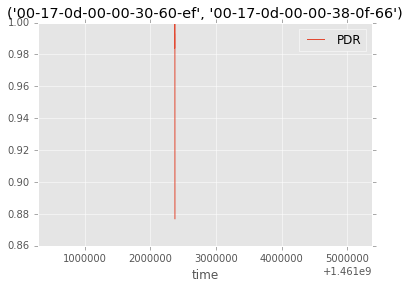

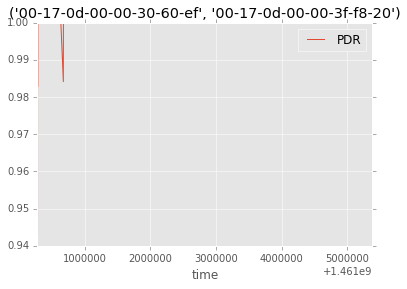

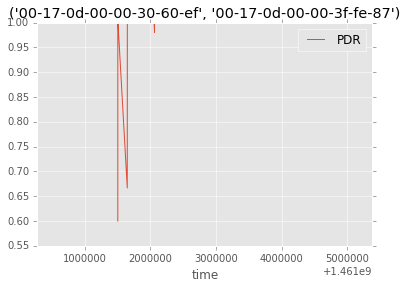

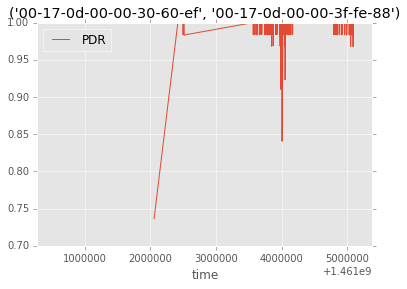

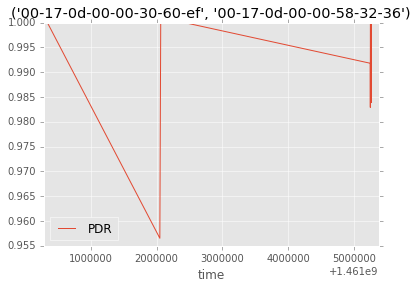

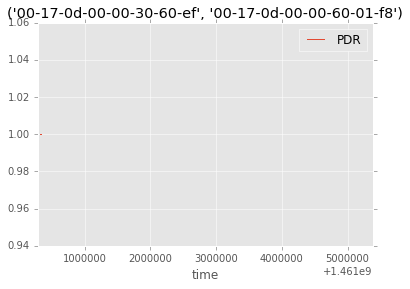

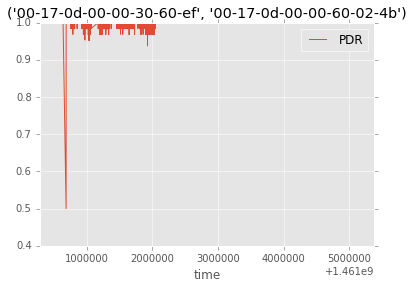

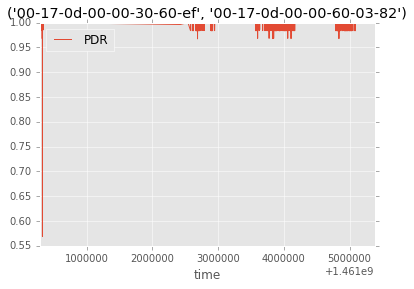

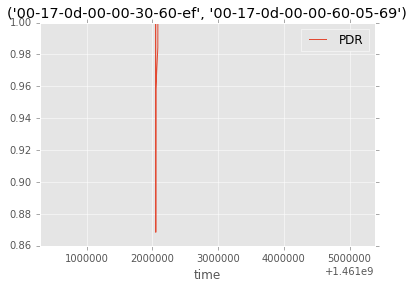

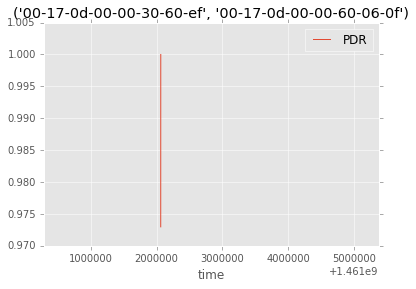

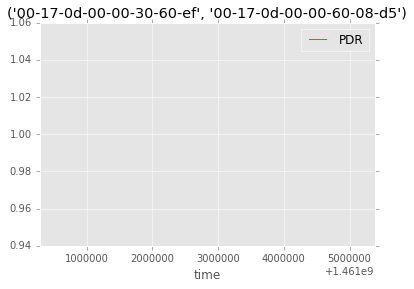

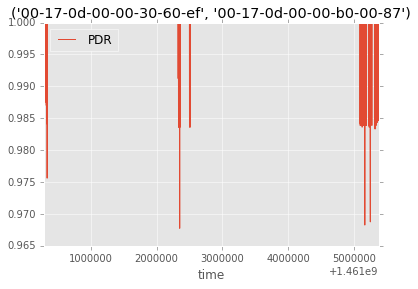

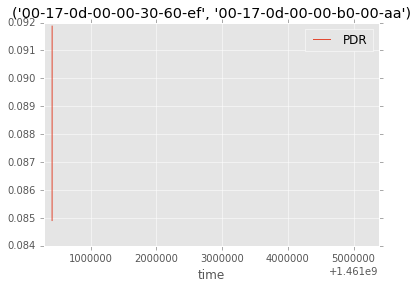

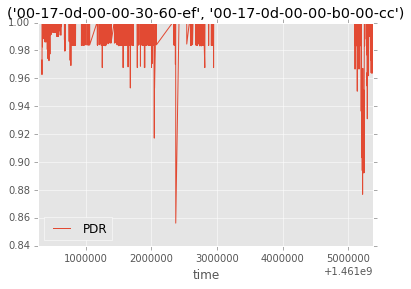

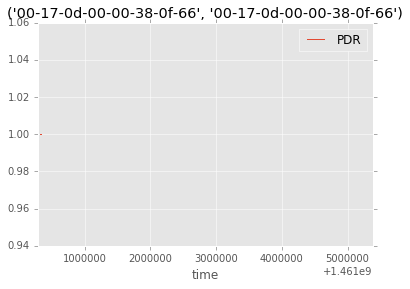

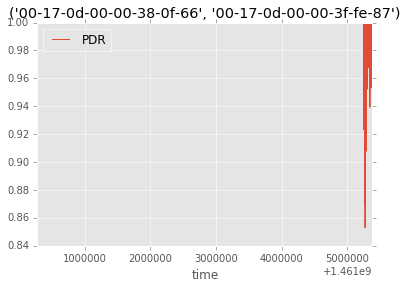

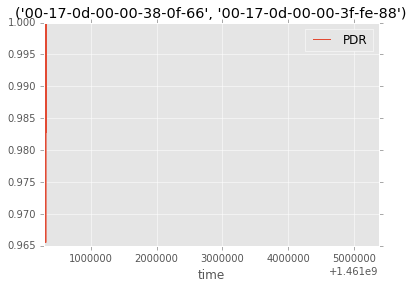

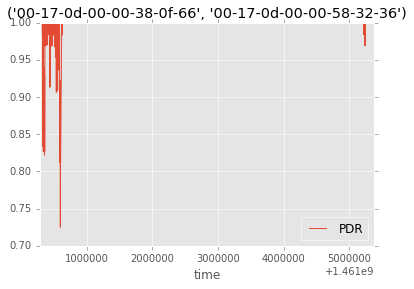

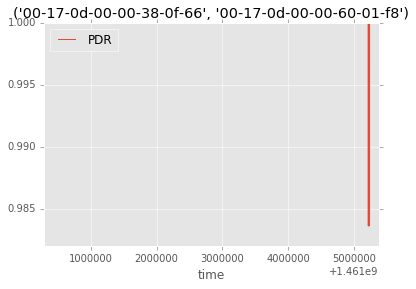

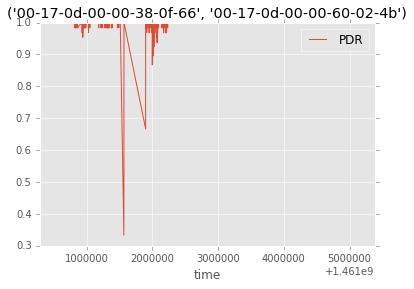

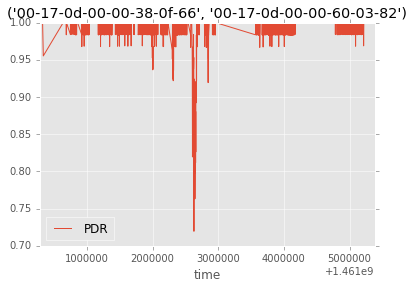

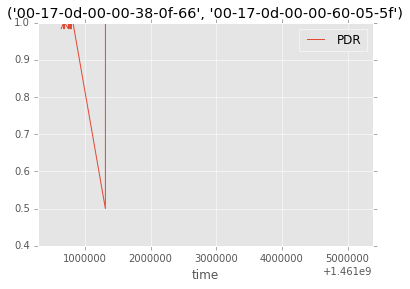

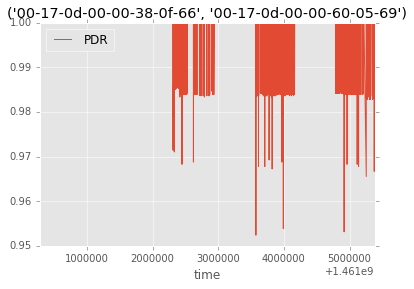

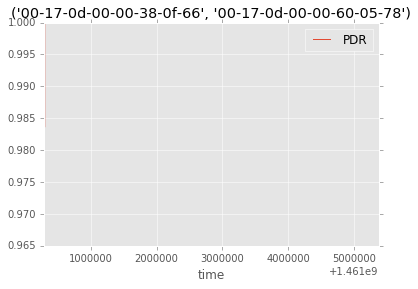

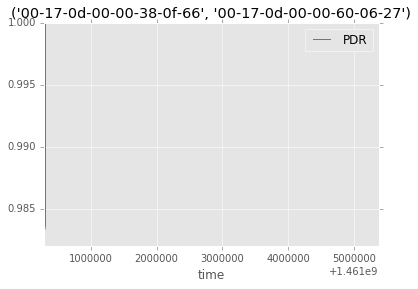

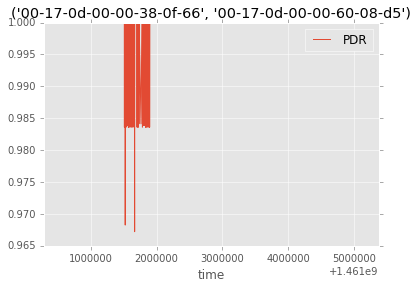

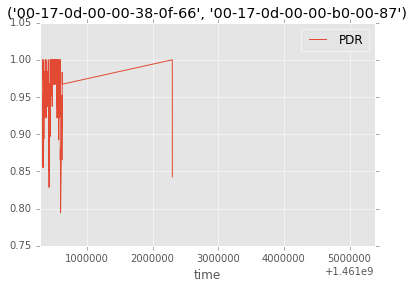

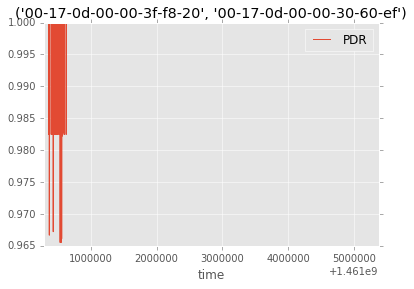

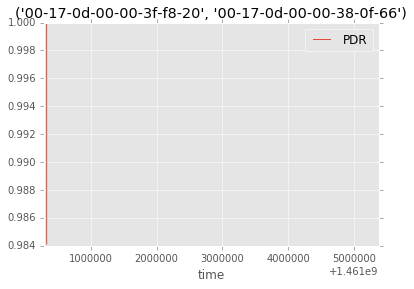

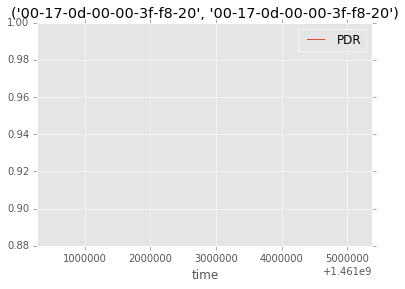

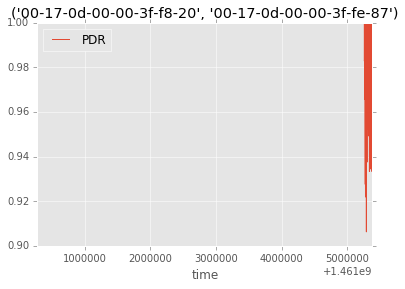

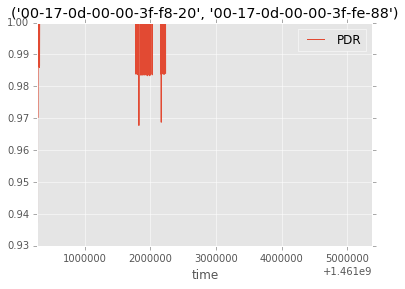

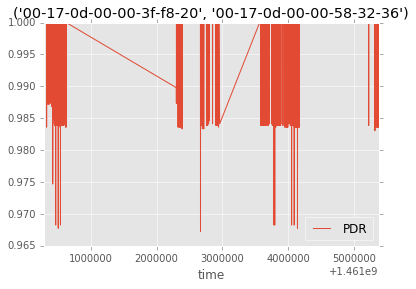

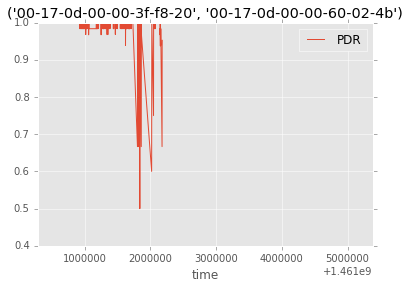

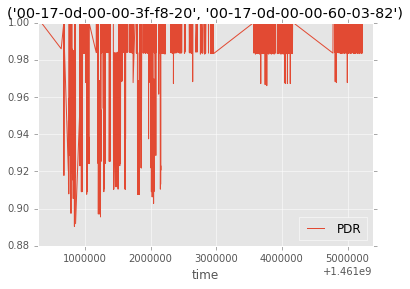

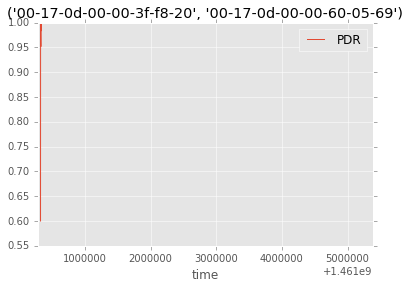

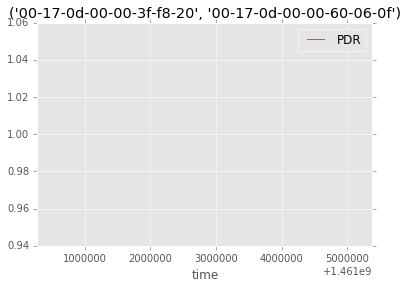

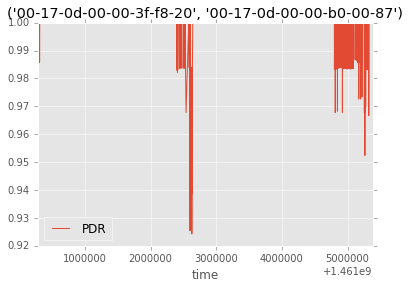

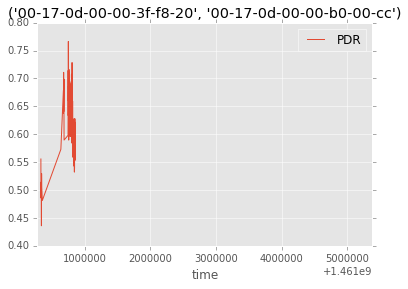

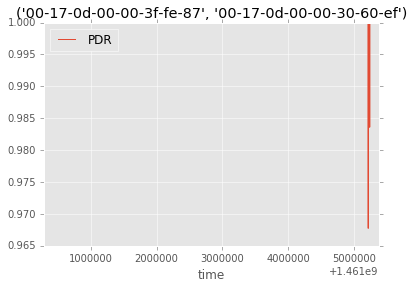

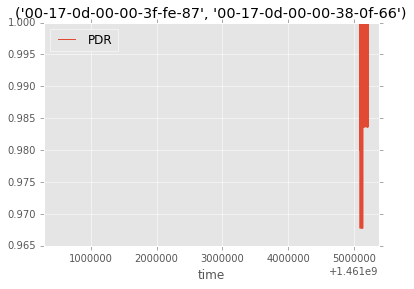

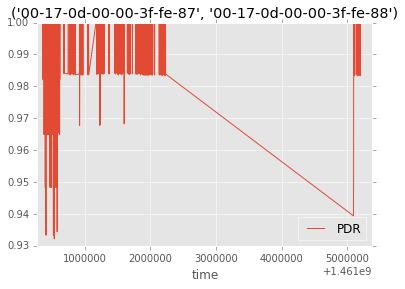

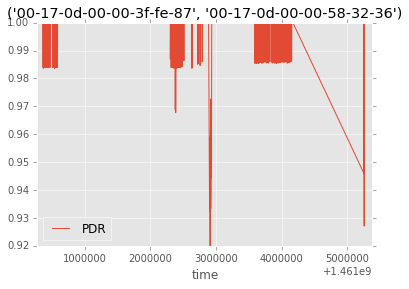

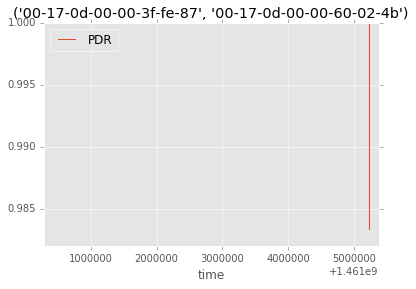

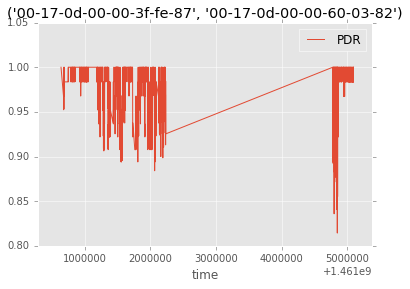

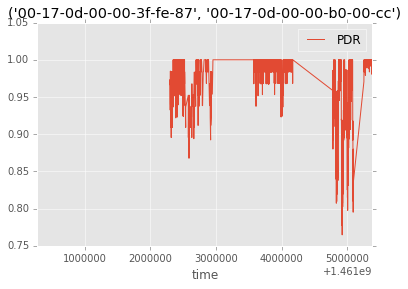

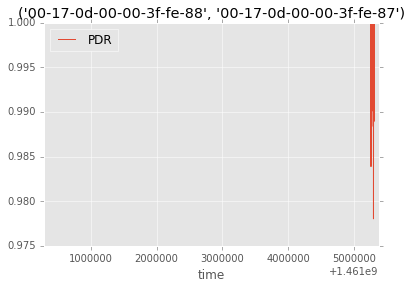

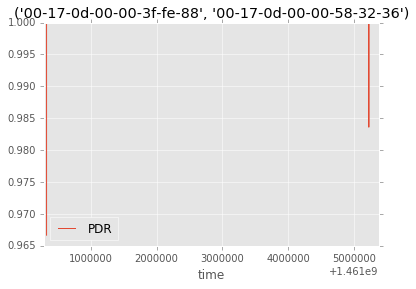

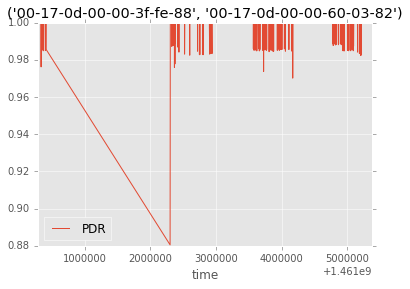

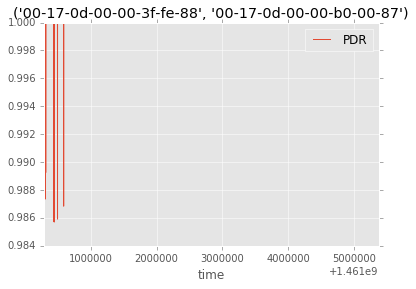

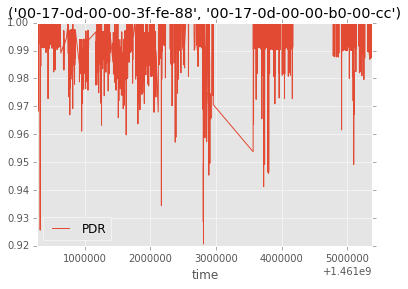

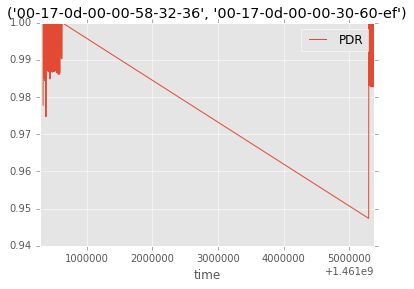

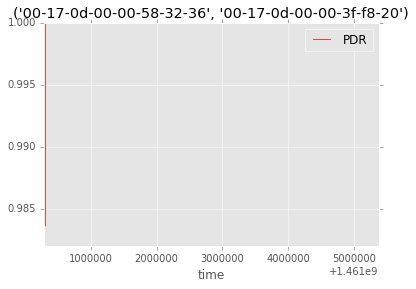

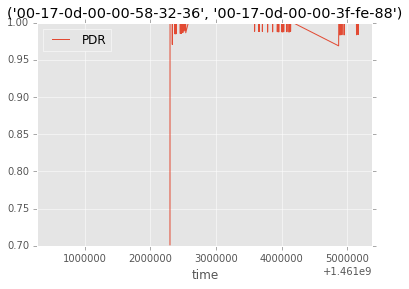

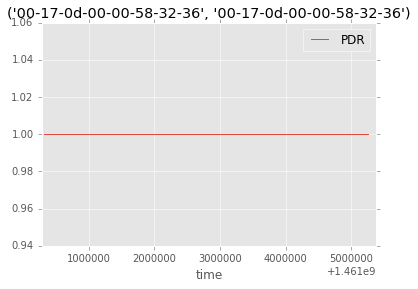

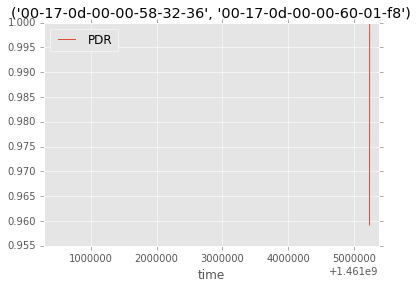

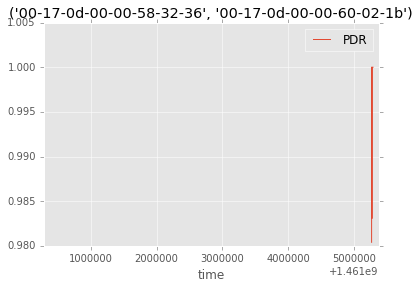

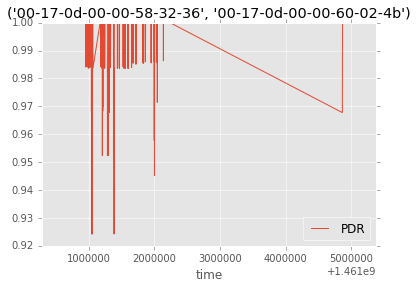

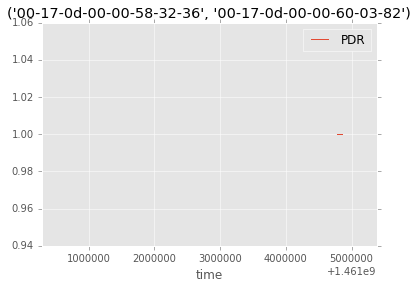

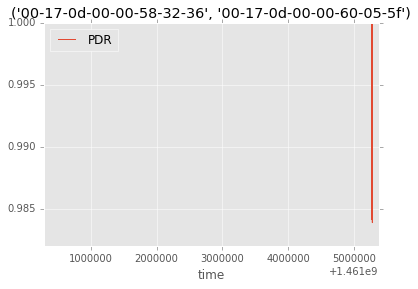

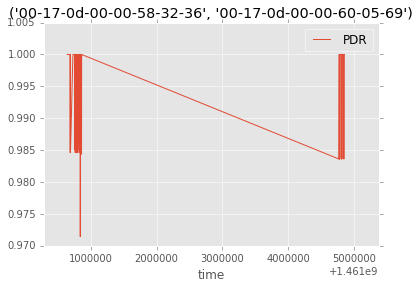

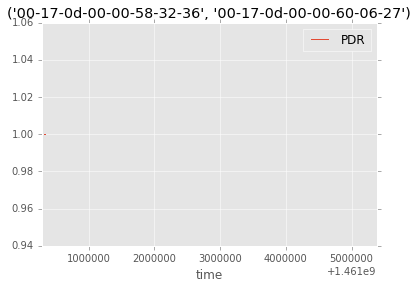

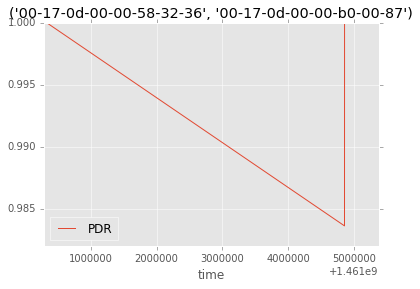

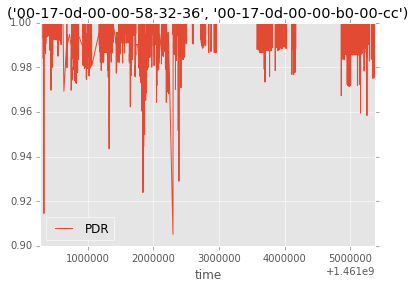

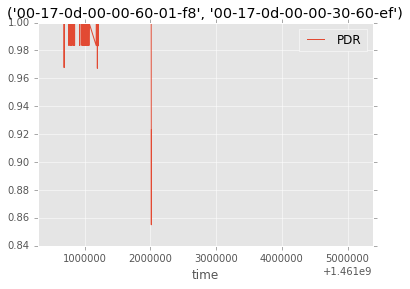

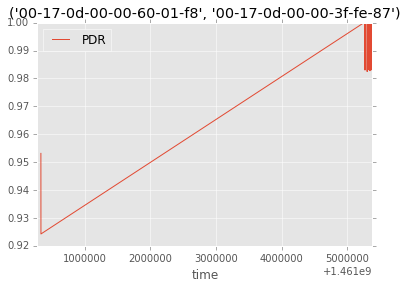

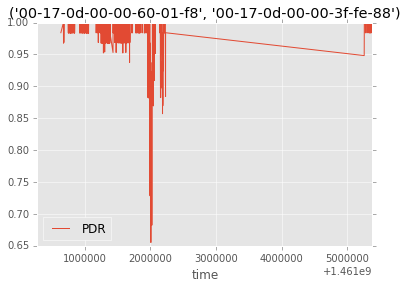

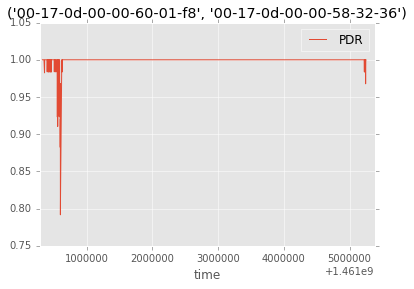

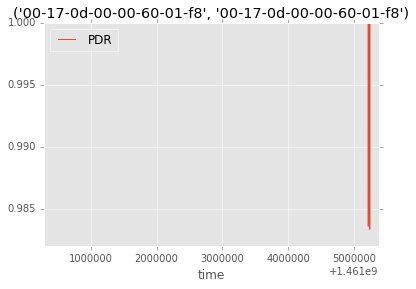

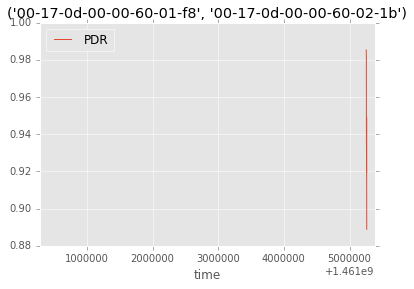

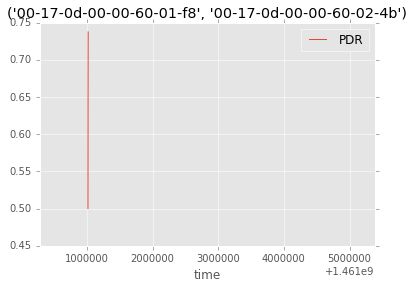

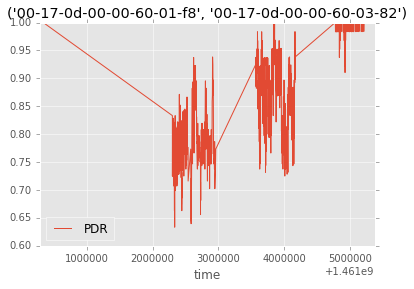

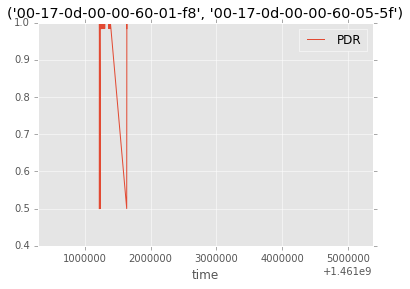

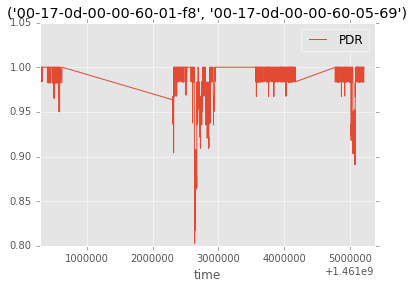

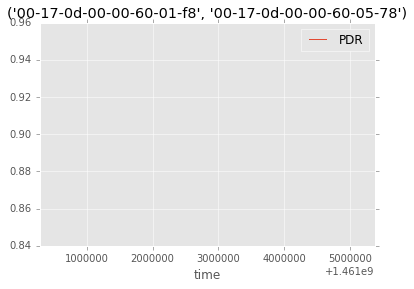

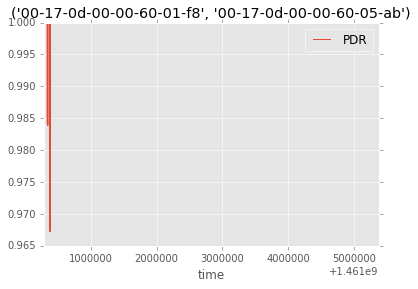

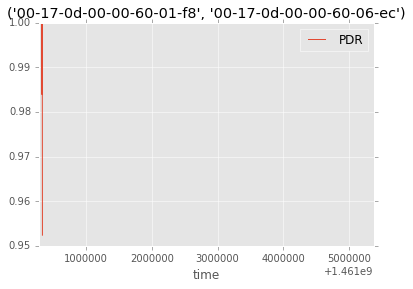

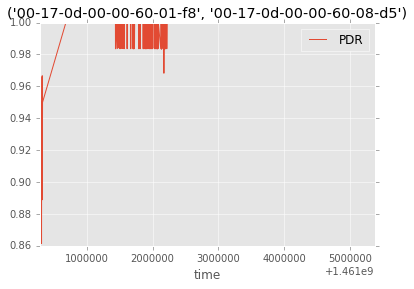

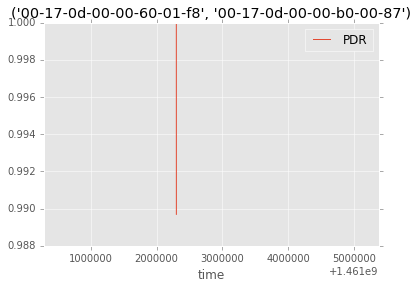

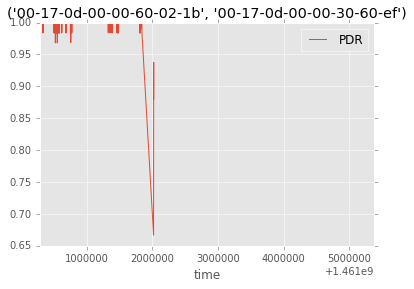

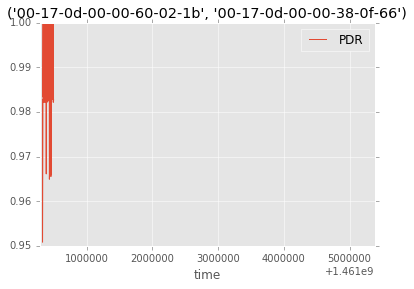

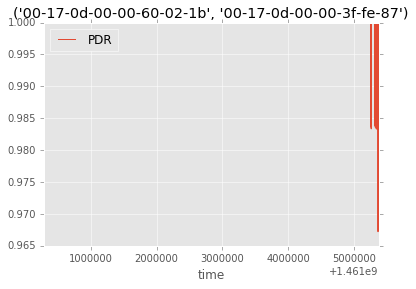

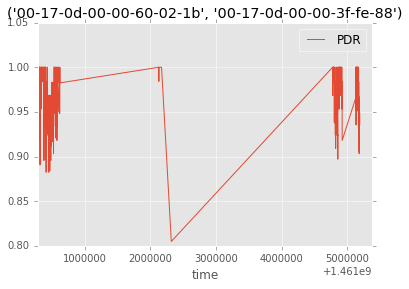

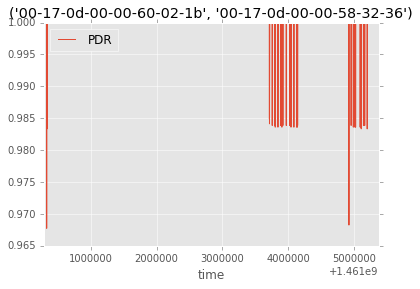

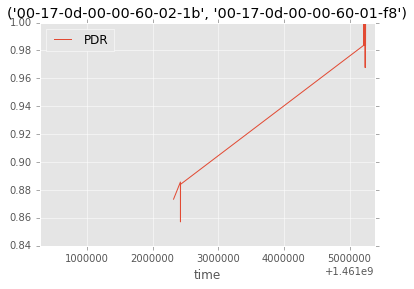

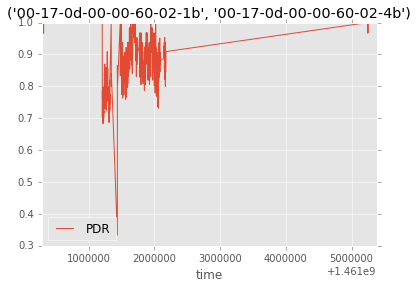

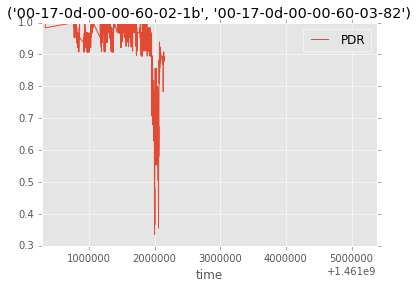

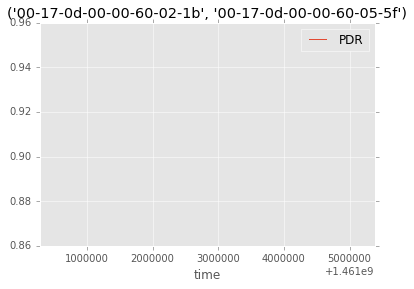

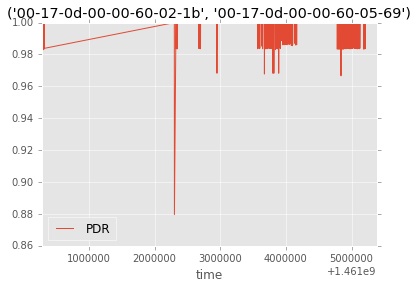

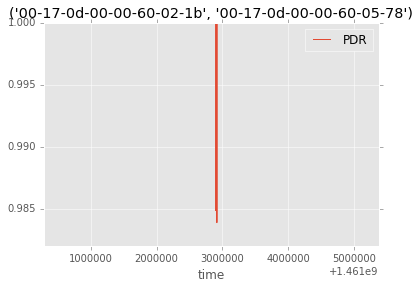

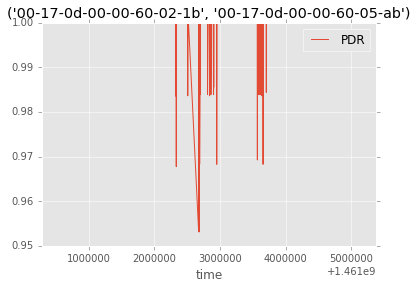

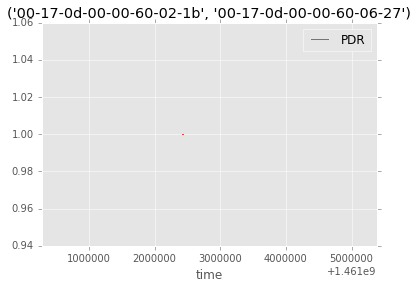

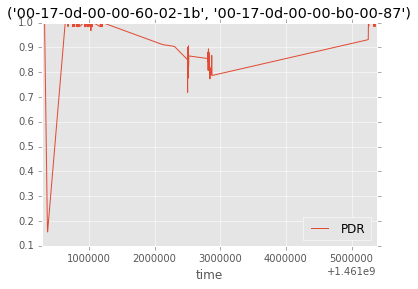

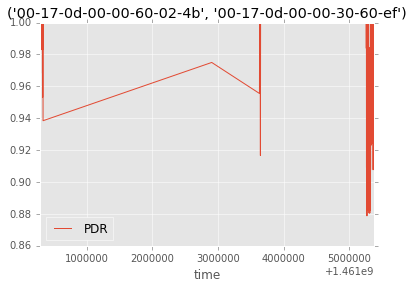

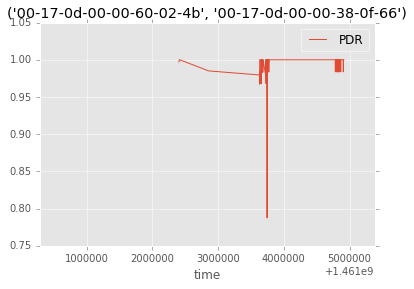

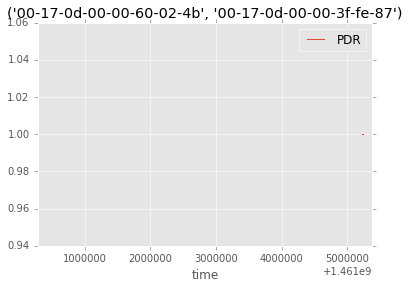

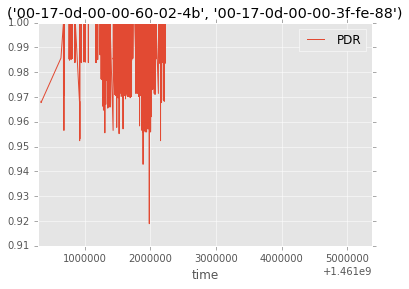

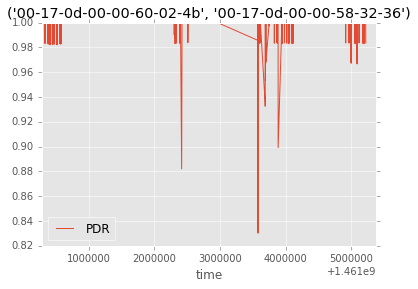

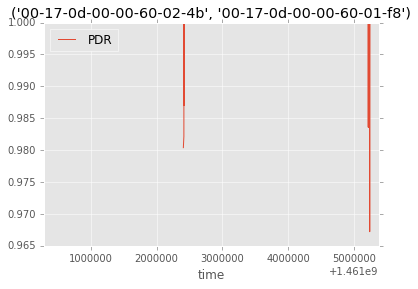

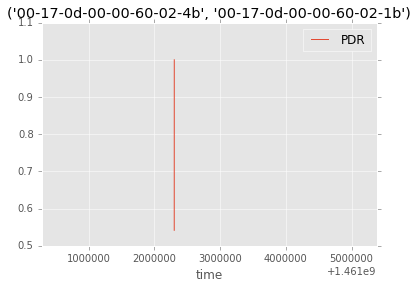

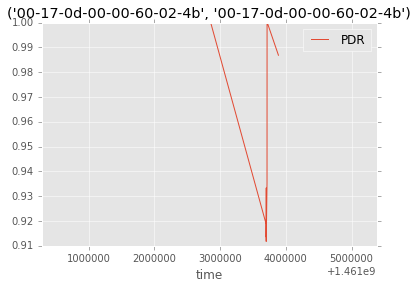

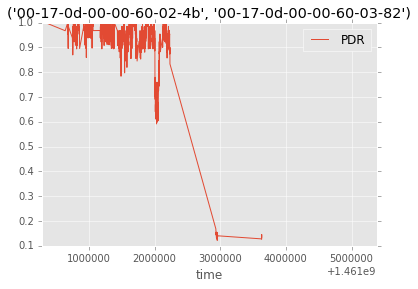

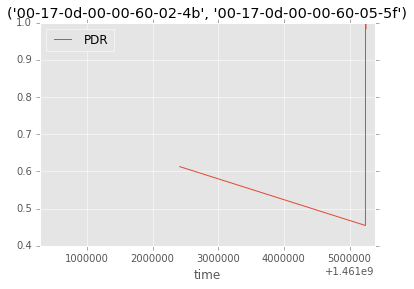

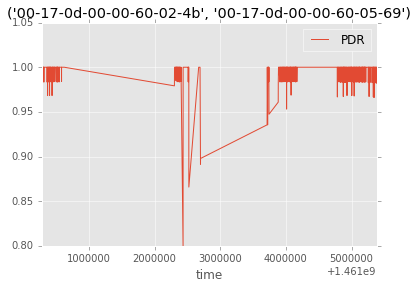

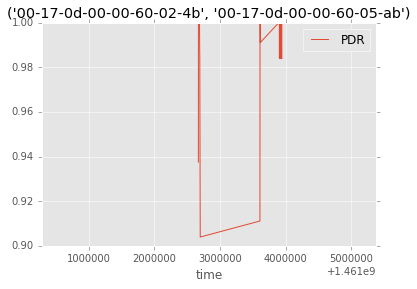

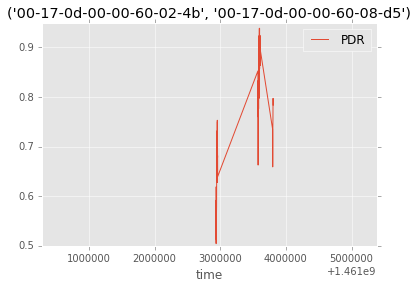

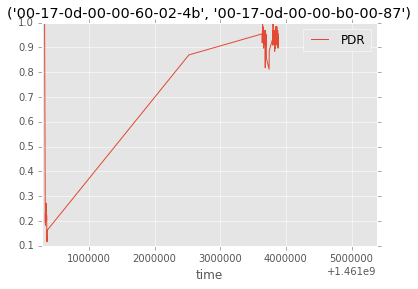

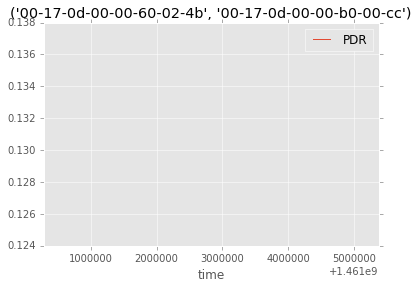

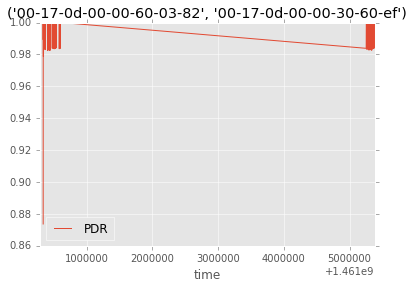

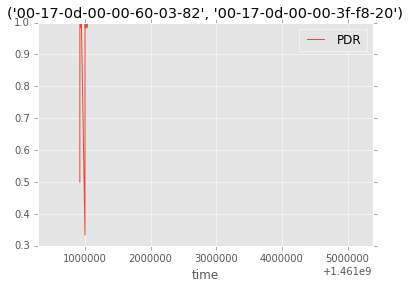

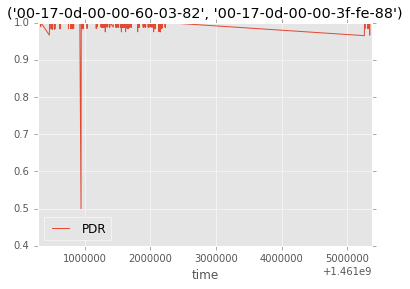

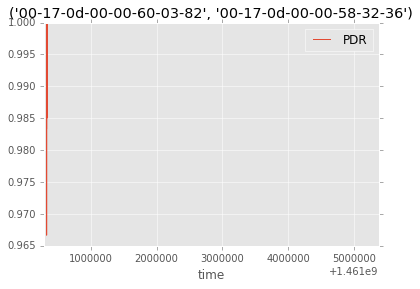

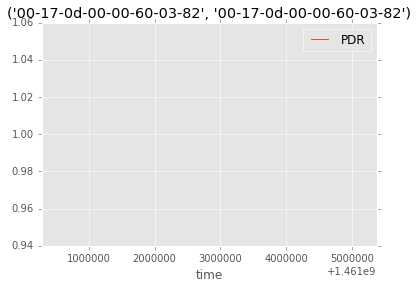

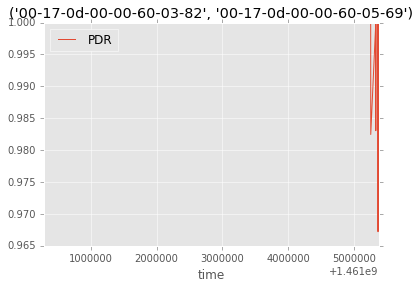

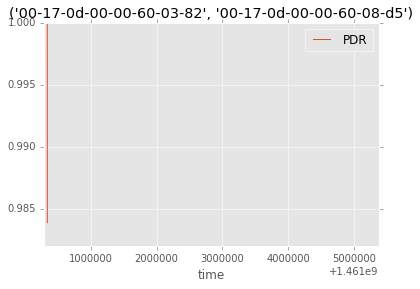

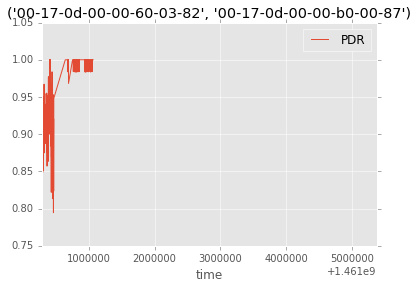

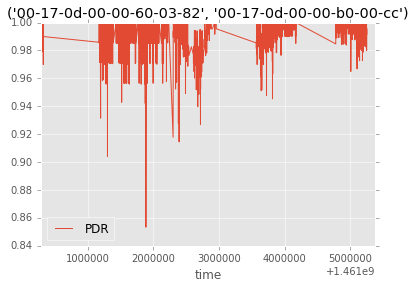

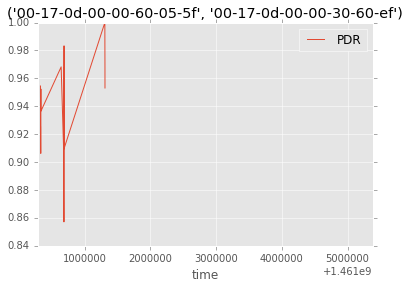

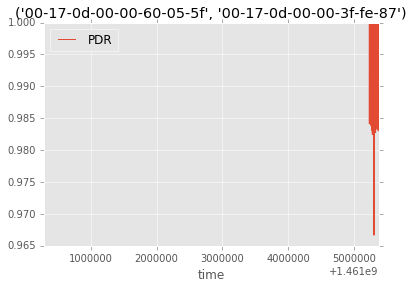

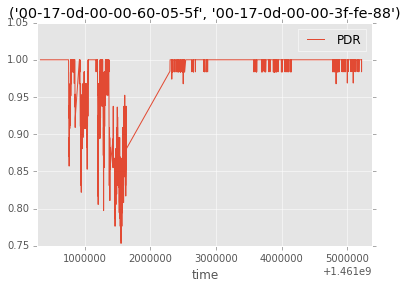

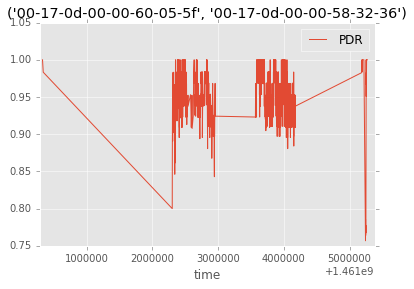

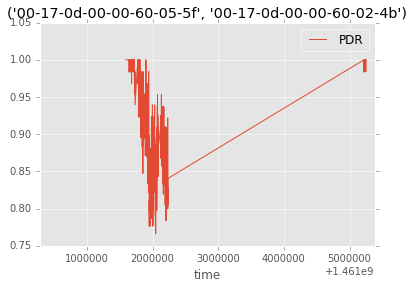

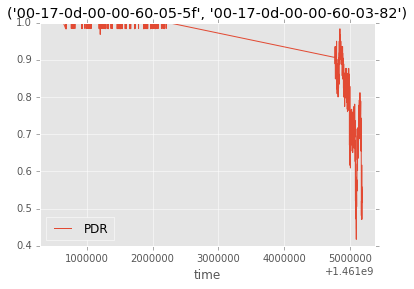

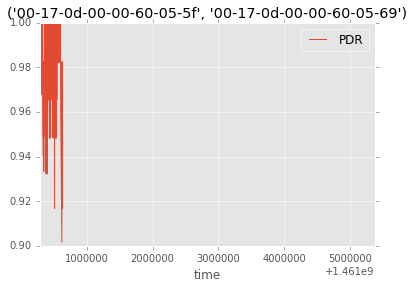

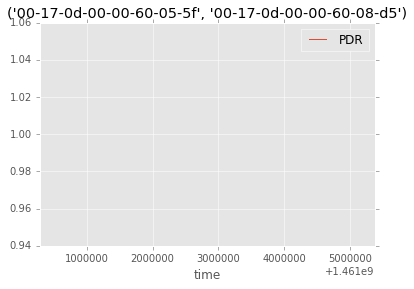

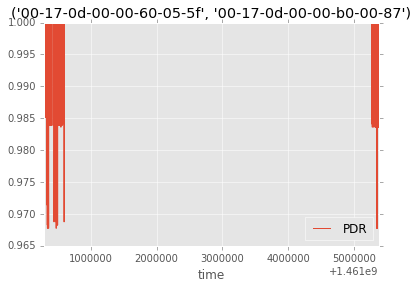

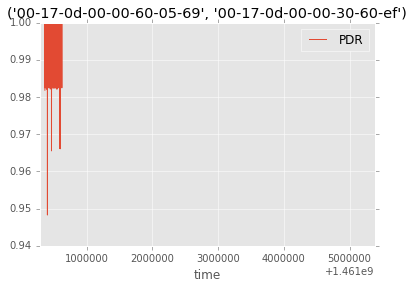

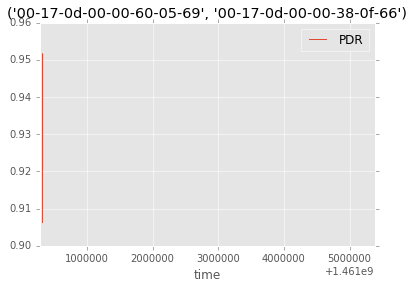

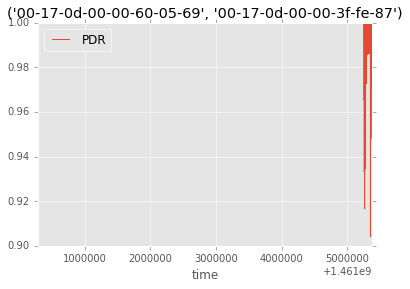

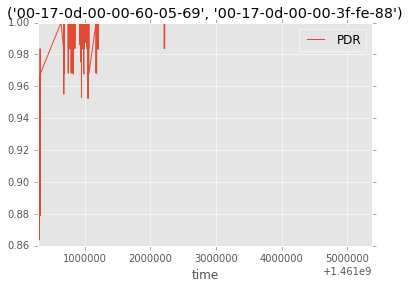

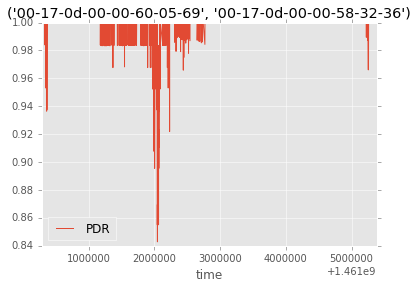

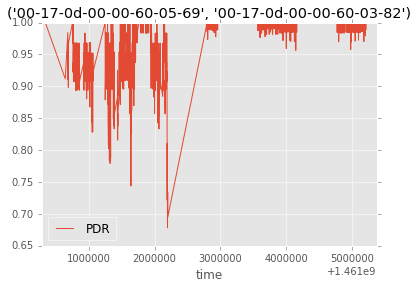

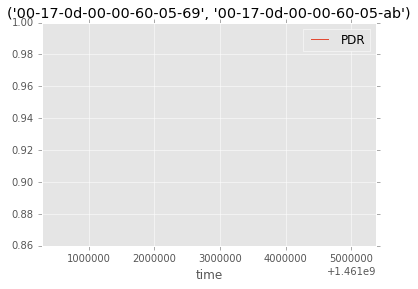

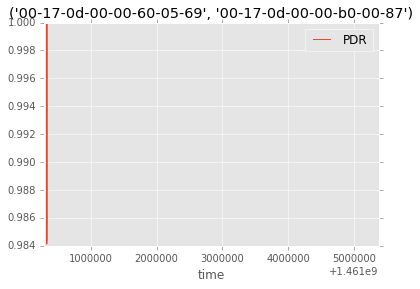

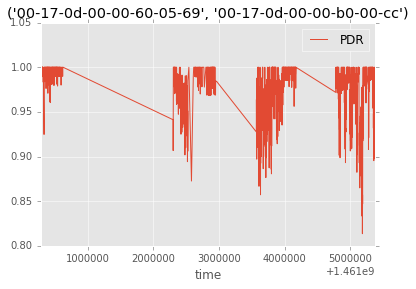

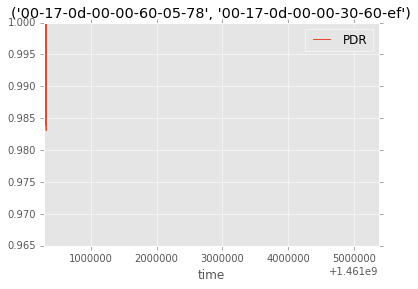

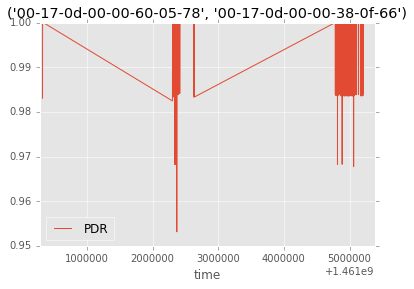

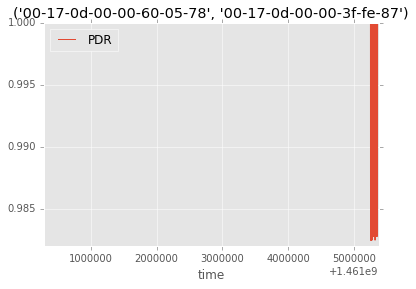

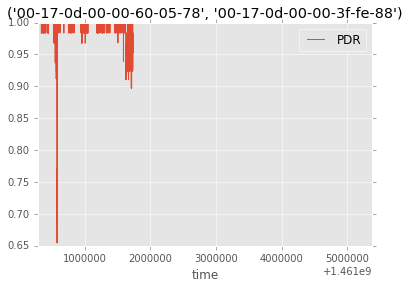

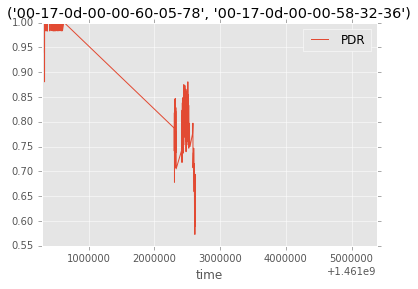

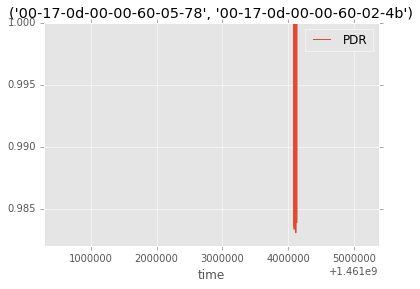

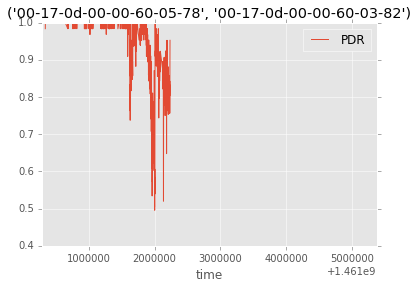

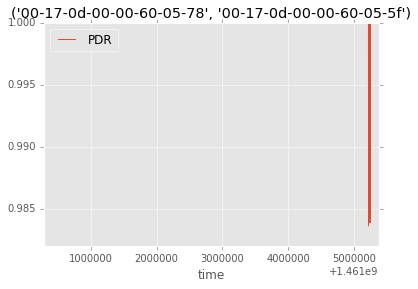

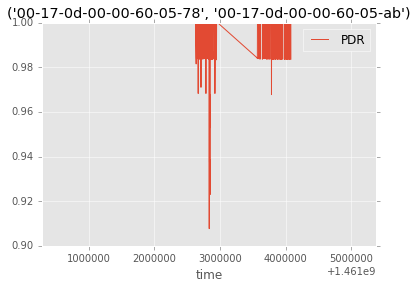

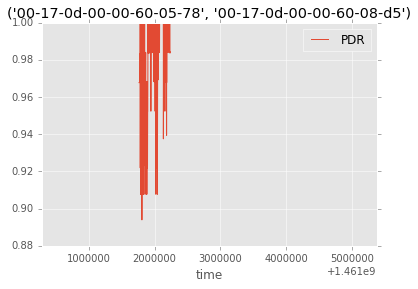

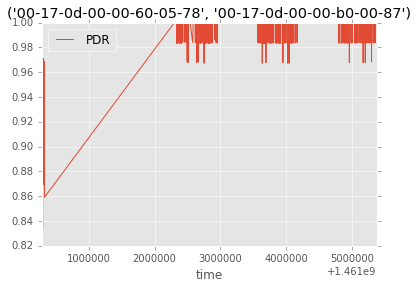

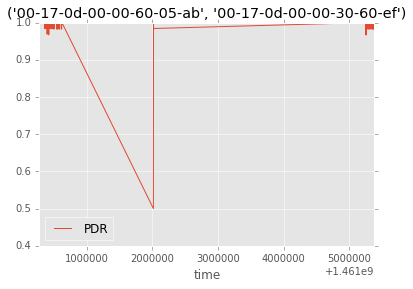

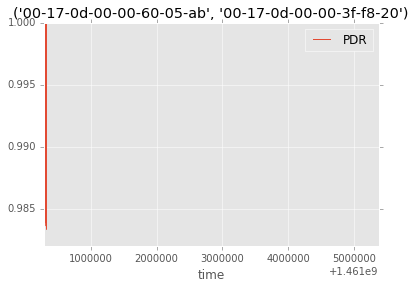

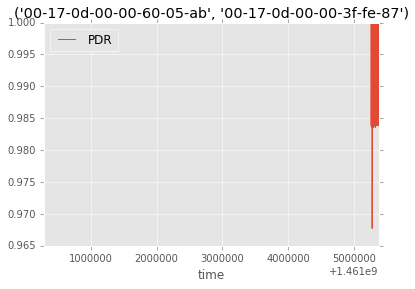

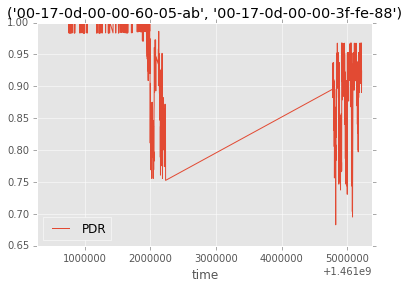

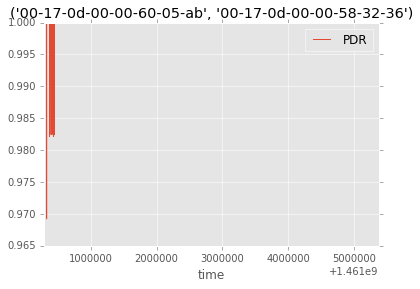

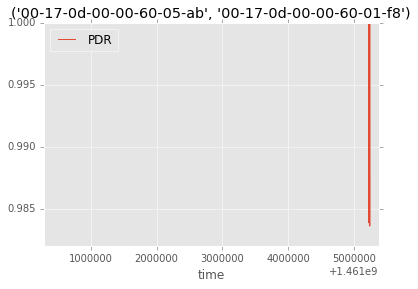

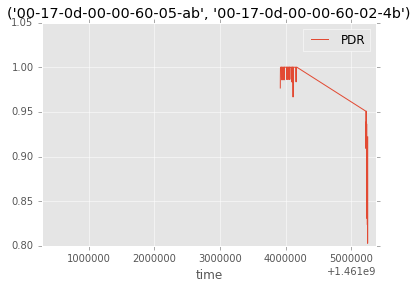

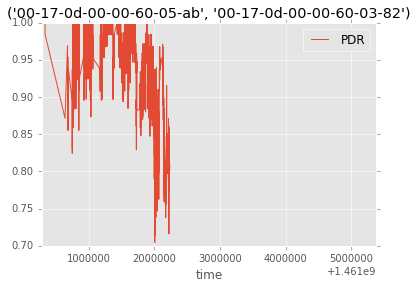

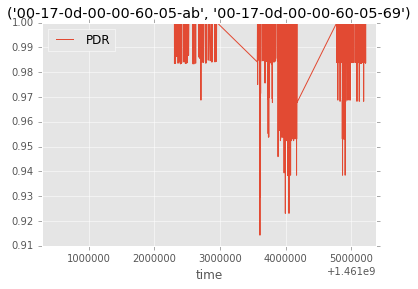

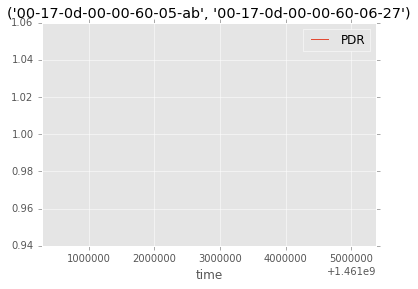

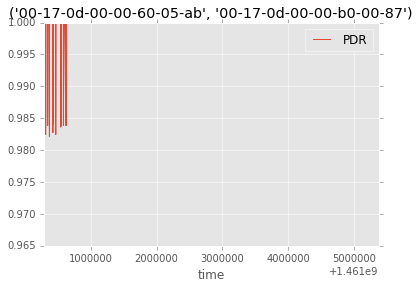

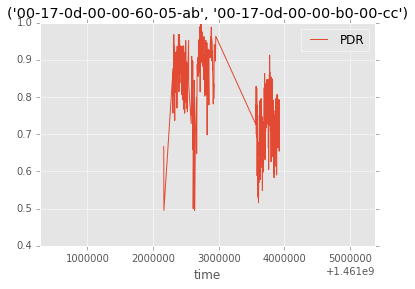

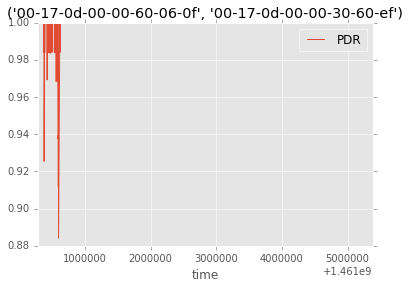

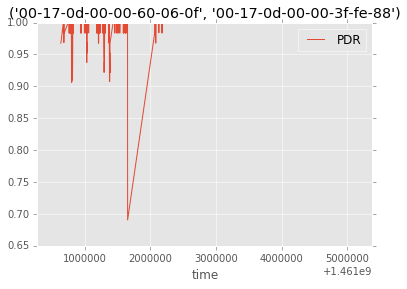

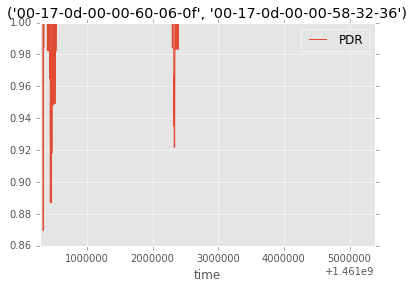

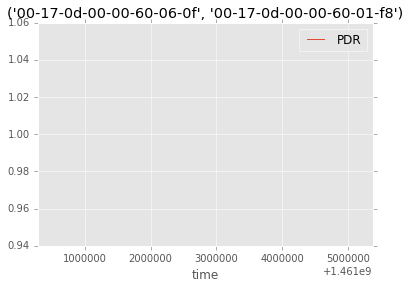

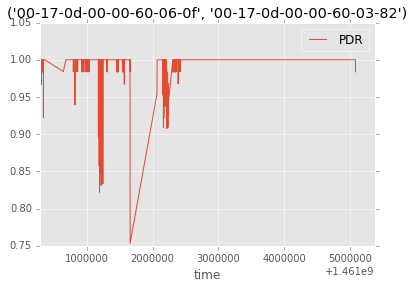

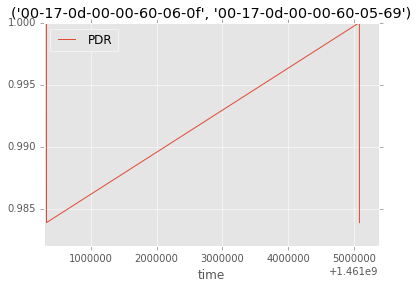

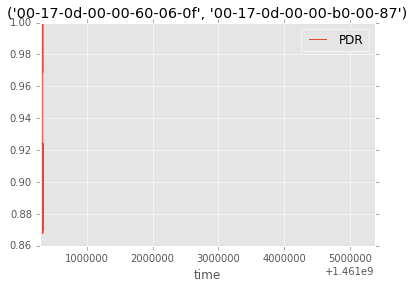

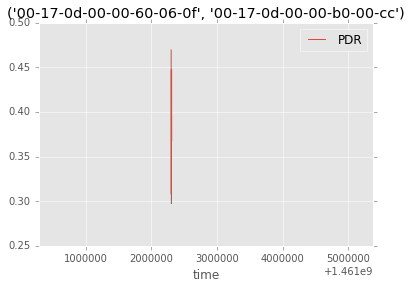

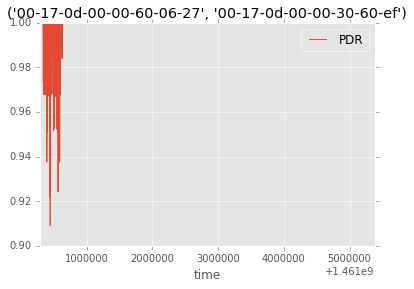

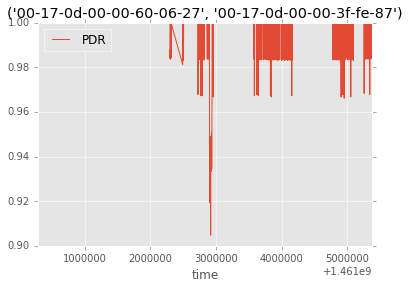

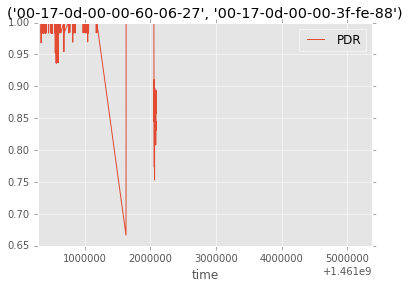

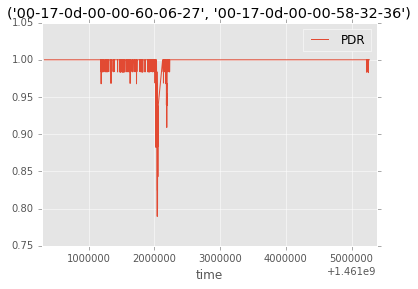

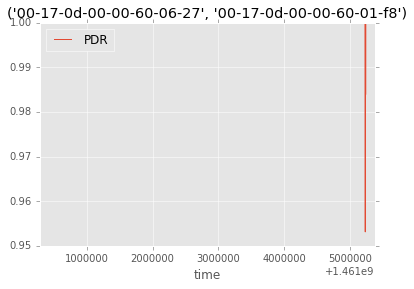

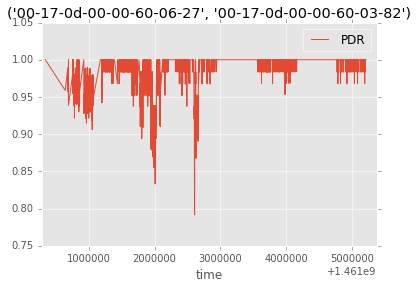

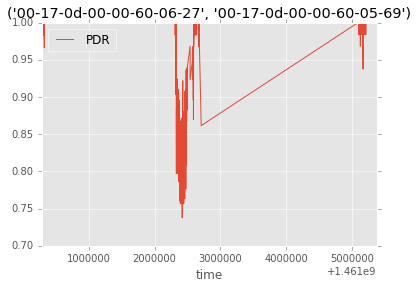

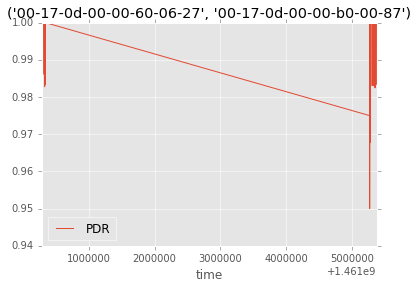

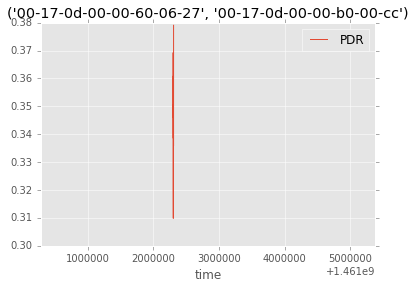

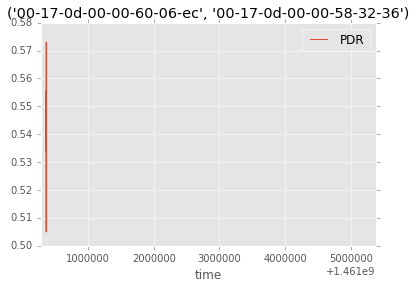

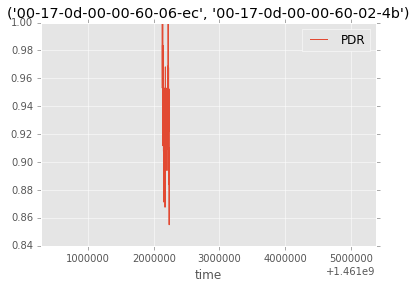

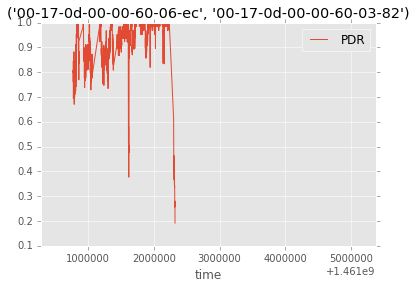

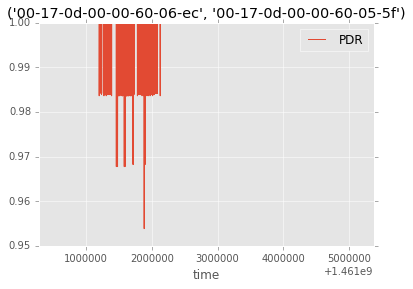

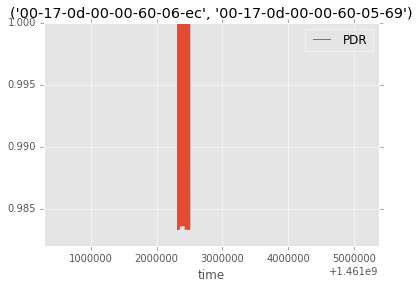

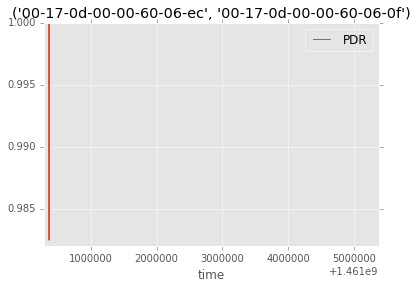

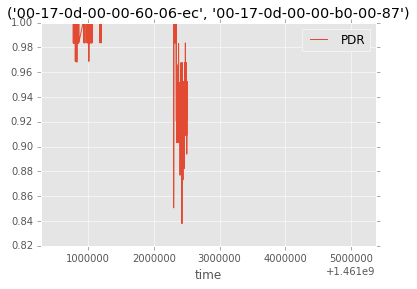

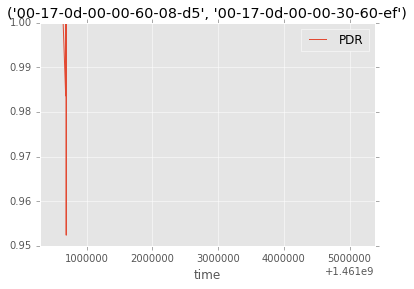

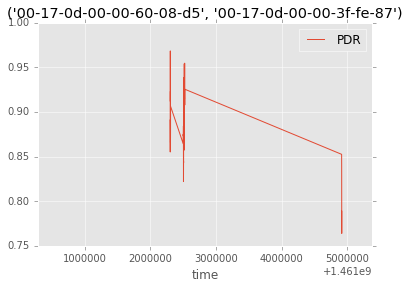

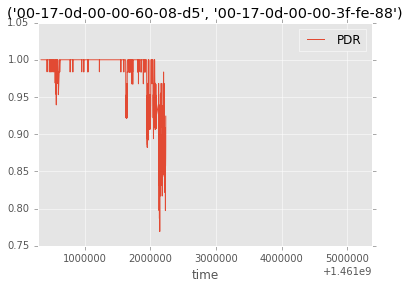

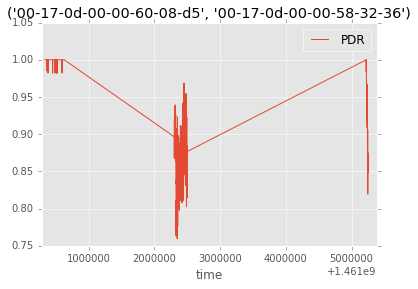

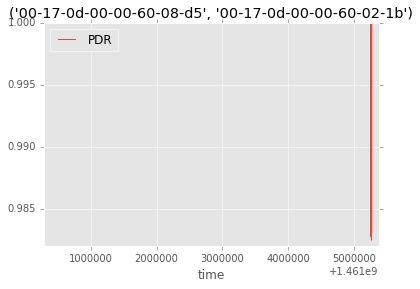

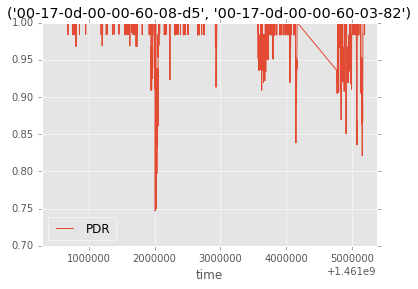

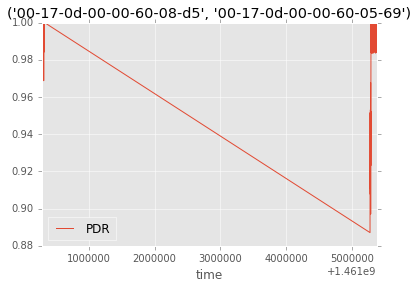

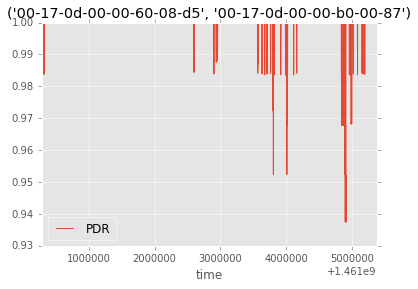

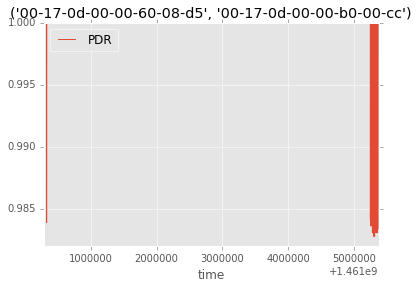

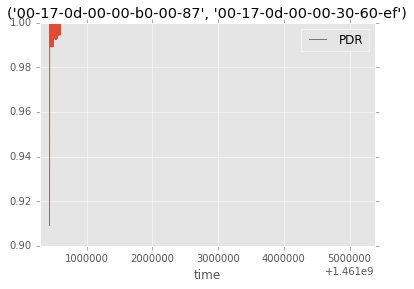

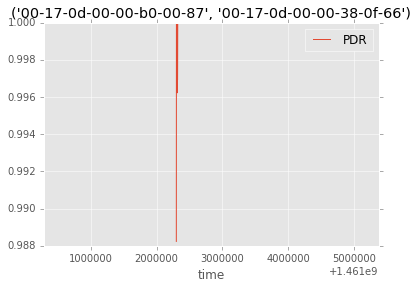

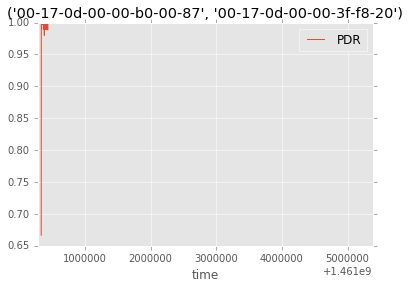

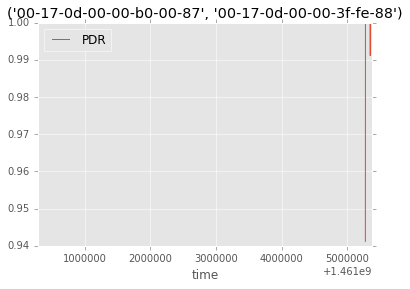

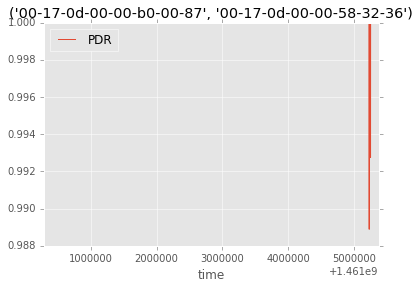

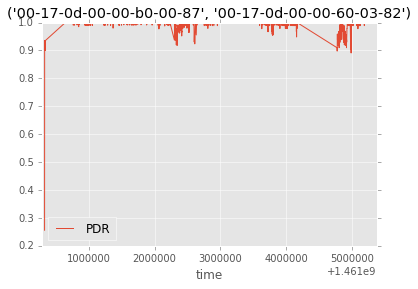

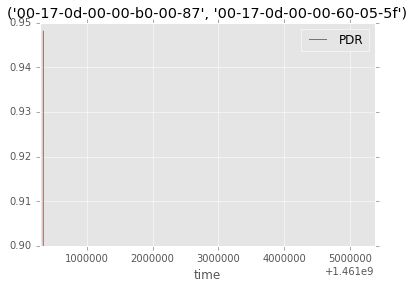

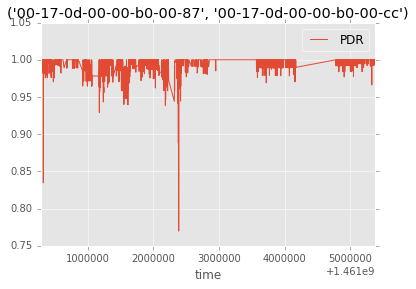

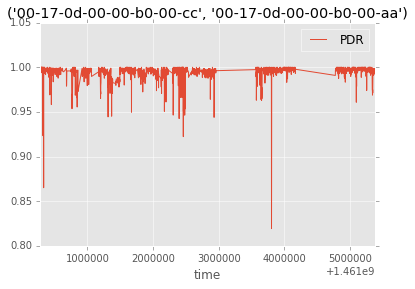

In [18]:
for name, group in grouped:
    indexed_group = group.set_index(["time"])
    indexed_group["PDR"].to_csv("../data/pdr_over_time/{0}_{1}".format(str(name[0][-5:]),str(name[1][-5:])), sep=' ')
    #plt.figure()
    #ax = group.plot(x="time", y="PDR", title=str(name), legend=True)
    #ax.set_ylim(df_clean.rssi.min(),df_clean.rssi.max())
    #ax.set_xlim(df_clean.time.min(),df_clean.time.max())